In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    roc_curve,
    auc,
    ConfusionMatrixDisplay
)

In [2]:
# Jika file belum di-upload, jalankan ini terlebih dahulu:
# from google.colab import file
# uploaded = files.upload()

data = pd.read_csv('heart_desease_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


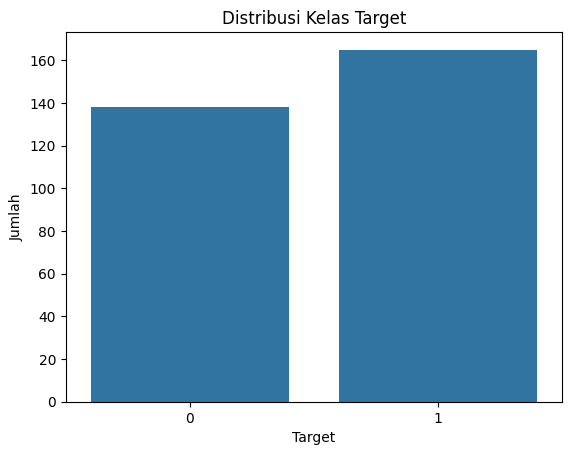

In [3]:
sns.countplot(x=data["target"])
plt.title("Distribusi Kelas Target")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()

<Axes: >

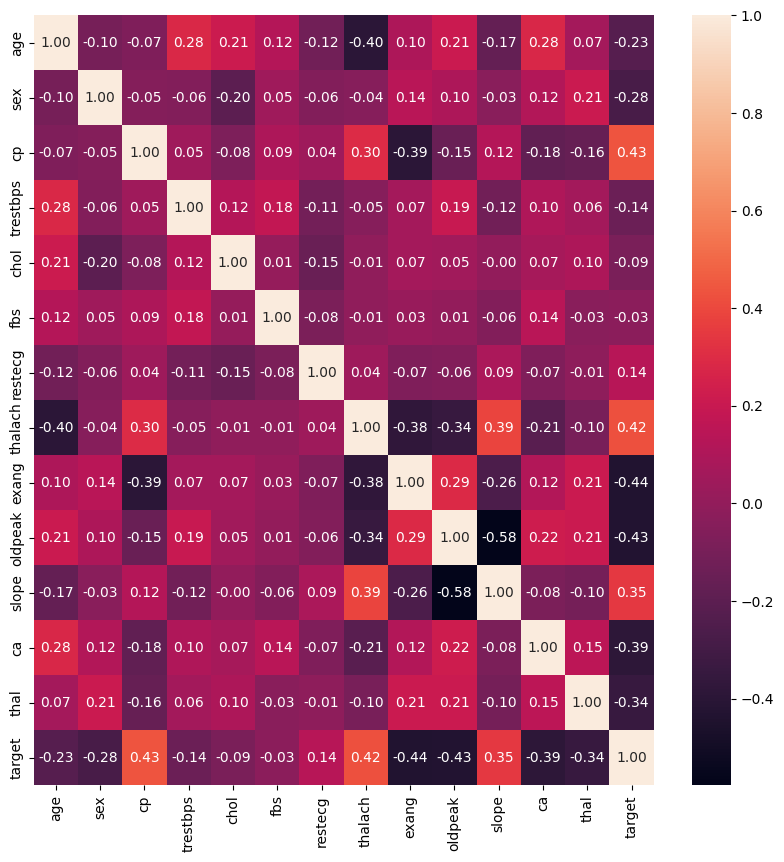

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')


In [9]:
seed = 0
test_size = 0.2
x = data.drop(["target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [10]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [12]:
clf.score(X_train, y_train)

0.8347107438016529

In [11]:
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
pred_proba = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



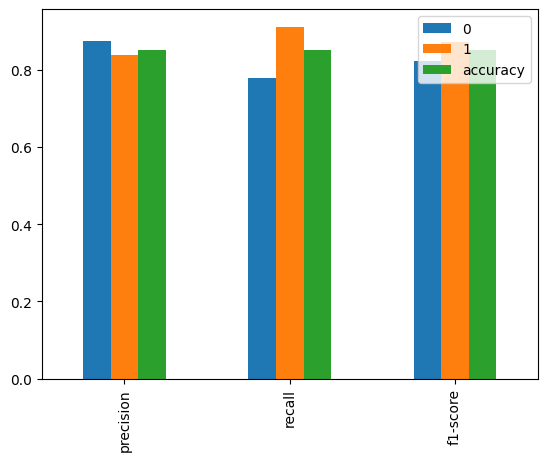

In [13]:
report= classification_report(y_test, pred, output_dict=True)
reporttb = pd.DataFrame(report).transpose()
reporttb.drop('support', inplace=True, axis=1)
reporttb.iloc[:3, :10].T.plot(kind='bar')
plt.show()